# Shruti Modale
## Data Science and Business Analytics Intern @ The Sparks Foundation
## Task 1
## Predict the percentage of an student based on the no. of study hours.


In [20]:
# importing required libaries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
# reading data
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
df.shape

(25, 2)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [24]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting data

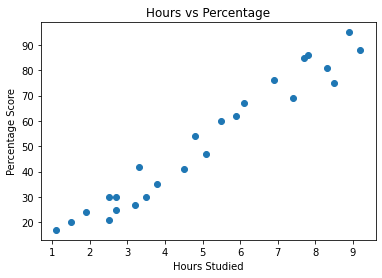

In [25]:
plt.scatter(x=df['Hours'].values,y=df['Scores'].values)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [26]:
# Data Cleaning
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [27]:
# feature and target variables
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

## Train Test Split 

In [28]:
# divide dataset into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [29]:
# Build and train our model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Plotting the regression line

In [30]:
print("Slope:",model.coef_)
print("Intercept:",model.intercept_)

Slope: [9.83544438]
Intercept: 1.989423110974684


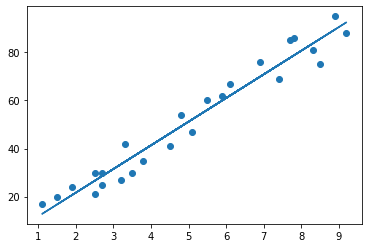

In [31]:
line = model.coef_ * x + model.intercept_

# Plotting for the dataset
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [32]:
# make preditions for testing set
y_pred = model.predict(x_test)
print(y_pred)

[28.54512294 39.36411177 34.44638957 60.01854497 16.74258969]


In [33]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,25,28.545123
1,35,39.364112
2,42,34.446390
3,62,60.018545
4,20,16.742590


## What will be predicted score if a student studies for 8.25 hrs/ day? 

In [34]:
# testing with your own data
hours = [8.25]
new_pred = model.predict([hours])
print("For",hours,"of study, score obtained will be",new_pred)

For [8.25] of study, score obtained will be [83.13183927]


## Model Evaluation

In [35]:
# Mean Absolute error
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.140342096254413


In [36]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

20.64145693125399
